#### Вариант функции A

1. Генерация коэффициентов $a, b, c, d$

In [1100]:
import numpy as np
import matplotlib.pyplot as plt

def create_function():
    return np.random.uniform(-3, 3, 4)

def compute_function_a(func_params, x):
    return func_params[0] * x**3 + func_params[1] * x**2 + func_params[2] * x + func_params[3]

func_params = create_function()

print(f"a = {func_params[0]}")
print(f"b = {func_params[1]}")
print(f"c = {func_params[2]}")
print(f"d = {func_params[3]}")

a = -0.09949468946129425
b = -1.4019613540936198
c = -1.786493279127783
d = -1.379068278094453


2. Генерация выборки (для равномероного распределения) и отображение результатов

In [1101]:
def uniform_sample_generation(values, num_samples, epsilon_0):

    # Генерация случайной ошибки измерения
    measurement_errors = np.random.uniform(-epsilon_0, epsilon_0, num_samples)

    # Генерация измерений с учетом ошибки
    measured_values = []
    for i in range(num_samples):
        measured_values.append(compute_function_a(func_params, values[i] + measurement_errors[i]))
    return measured_values

def show(values, measured_values):
    x = np.linspace(-1, 1, 500)
    y = func_params[0] * x**3 + func_params[1] * x**2 + func_params[2] * x + func_params[3]

    # Визуализация результатов
    plt.plot(x, y, label = 'ax^3 + bx^2 + cx + d', color = 'red')
    plt.scatter(values, measured_values, color = 'black')
    plt.title('Распределение измерений с ошибкой')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

2.1 Объем выборки 10

In [1102]:
num_samples = 10
uniform_values_10 = np.sort(np.random.uniform(-1, 1, num_samples))

 - $\varepsilon_0 = 0.5$

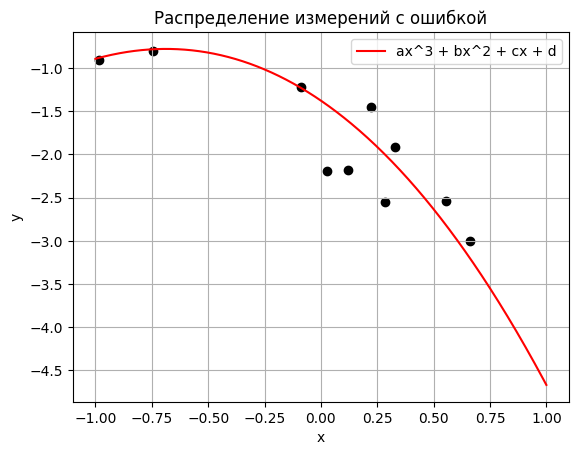

In [1103]:
epsilon_0 = 0.5

results_10_05 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_05)


- $\varepsilon_0 = 1$

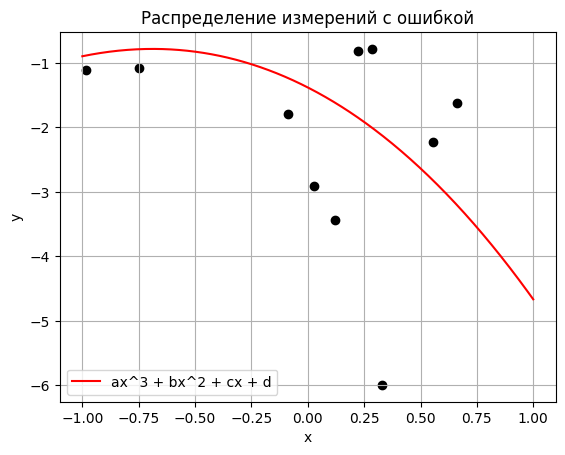

In [1104]:
epsilon_0 = 1

results_10_1 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_1)

- $\varepsilon_0 = 2$

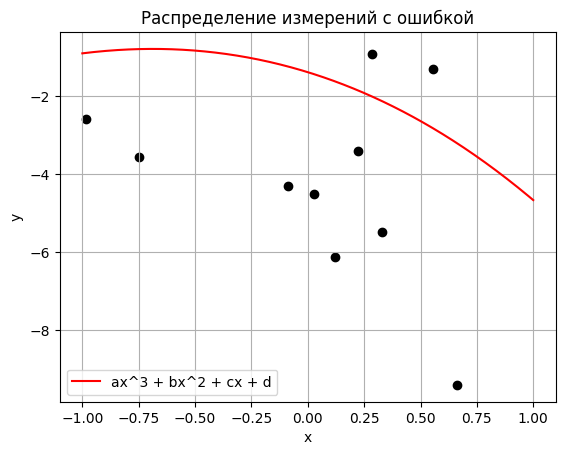

In [1105]:
epsilon_0 = 2

results_10_2 = uniform_sample_generation(uniform_values_10, num_samples, epsilon_0)
show(uniform_values_10, results_10_2)

3. Генерация выборки (для нормального распределения) и отображение результатов

In [1106]:
def normal_values_generation(left, right, num_values, mean, std):
    values = []
    while len(values) < num_values:
        x = np.random.normal(mean, std)
        if x >= left and x <= right:
            values.append(x)
    
    return np.array(values)

def normal_sample_generation(values, mean, std, num_samples):
    left = mean - 3 * std
    right = mean + 3 * std
    
    # Генерация случайной ошибки измерения
    measurement_errors = normal_values_generation(left, right, num_samples, mean, std)

    # Генерация измерений с учетом ошибки
    measured_values = []
    for i in range(num_samples):
        measured_values.append(compute_function_a(func_params, values[i] + measurement_errors[i]))
    
    return measured_values

3.1 Объём выборки 10

In [1107]:
num_samples = 10
normal_values_10 = np.sort(np.random.uniform(-1, 1, num_samples))

 - $\varphi = 0$, $\sigma = 0.5$

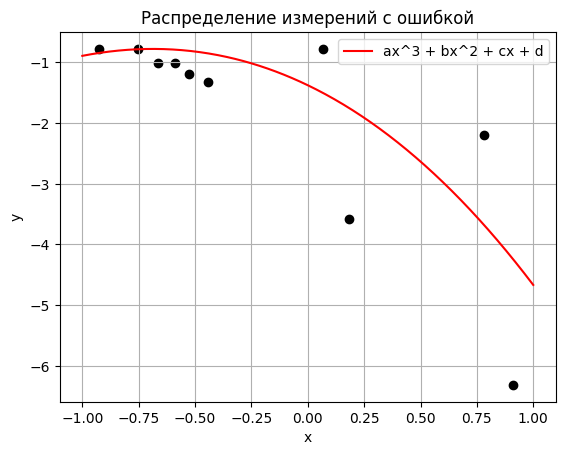

In [1108]:
mean = 0
std = 0.5

nresults_10_05 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_05)

 - $\varphi = 0$, $\sigma = 1$

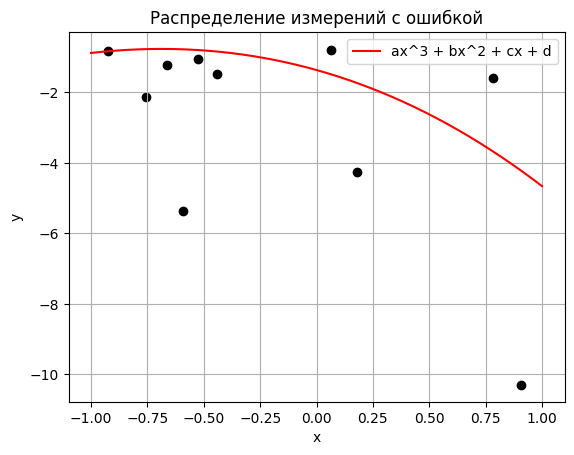

In [1109]:
mean = 0
std = 1
nresults_10_1 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_1)

 - $\varphi = 1$, $\sigma = 0.5$

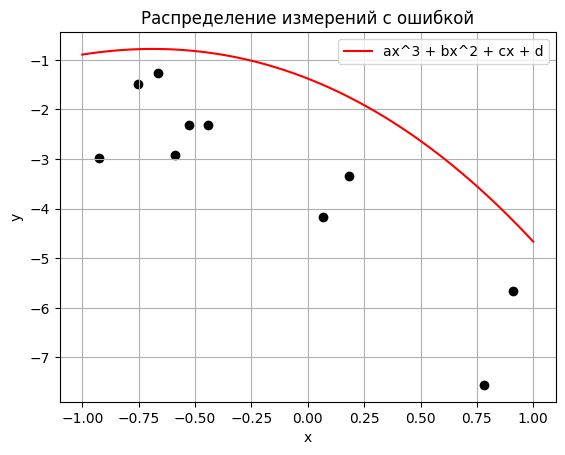

In [1110]:
mean = 1
std = 0.5
nresults_10_05_10 = normal_sample_generation(normal_values_10, mean, std, num_samples)
show(normal_values_10, nresults_10_05_10)

3. Решение задачи полиномиальной регрессии

- Визуализация

In [1111]:

def show_predict(x, y, p, x_study, y_study):
    # Визуализация результатов
    plt.scatter(x_study, y_study, color='green', label=f'Точки обучающей выборки')

    plt.plot(x, y, label = 'ax^3 + bx^2 + cx + d', color = 'red')
    plt.plot(x, p(x), color='blue', label=f'Предсказанная функция')

    plt.title('Полиномиальная регрессия для имеющейся выборки')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

- Обучение с размером выборки 1000

In [1210]:
num_samples = 200
epsilon_0 = 0.1

x_uniform_study = np.random.uniform(-1, 1, num_samples)
y_uniform_study = uniform_sample_generation(x_uniform_study, num_samples, epsilon_0)

degree = 30

p = np.poly1d(np.polyfit(x_uniform_study, y_uniform_study, degree))

По итогу получаем полином, по которому можно получать приближённые значения нашей функции.
Теперь используем его для её приближённого вычисления

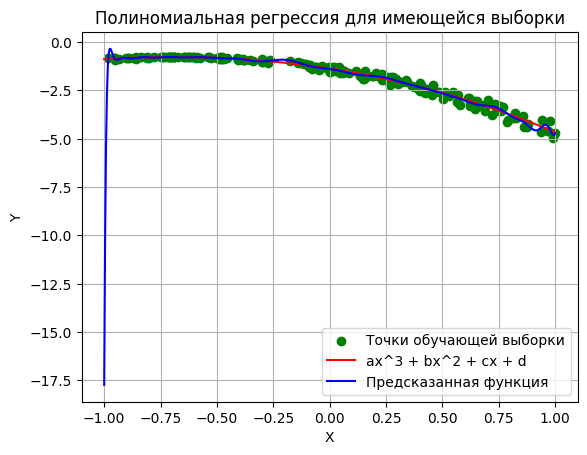

In [1211]:
x = np.linspace(-1, 1, 500)
y = func_params[0] * x**3 + func_params[1] * x**2 + func_params[2] * x + func_params[3]

show_predict(x, y, p, x_uniform_study, y_uniform_study)

Получившаяся модель неплохо справляется с предсказаниями (с небольшими степенями полинома)

Теперь обучим модель на меньшей выборке

In [1124]:
num_samples = 100
epsilon_0 = 0.5

x_uniform_study = np.random.uniform(-1, 1, num_samples)
y_uniform_study = uniform_sample_generation(x_uniform_study, num_samples, epsilon_0)

degree = 5

p = np.poly1d(np.polyfit(x_uniform_study, y_uniform_study, degree))

Снова построим приближённую функцию

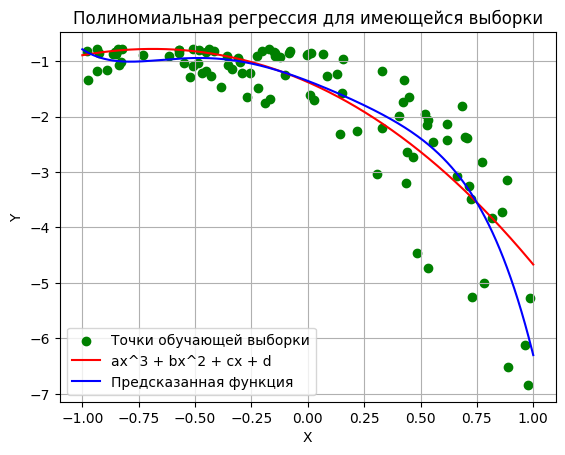

In [1125]:
show_predict(x, y, p, x_uniform_study, y_uniform_study)

Полученный результат хуже предсказывает нашу функцию и быстро уходит в переобучение при увеличении степени

Уменьшим обучающую выборку ещё сильнее

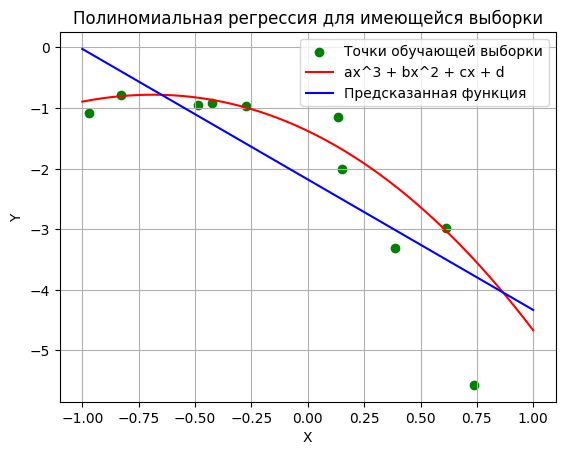

In [1116]:
num_samples = 10
epsilon_0 = 0.5

x_uniform_study = np.random.uniform(-1, 1, num_samples)
y_uniform_study = uniform_sample_generation(x_uniform_study, num_samples, epsilon_0)

degree = 1

p = np.poly1d(np.polyfit(x_uniform_study, y_uniform_study, degree))

show_predict(x, y, p, x_uniform_study, y_uniform_study)

Теперь получим аналогичные графики для нормального распределения

- обучение

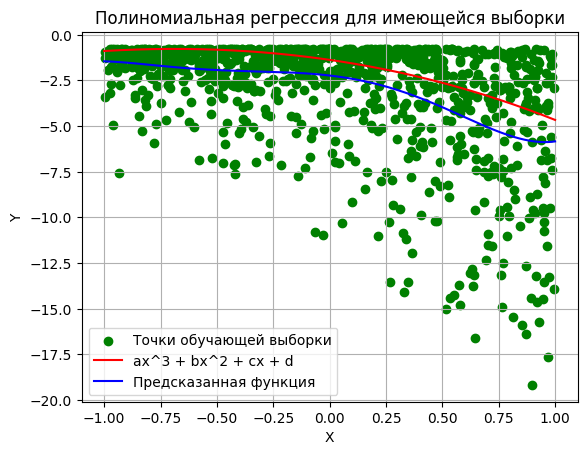

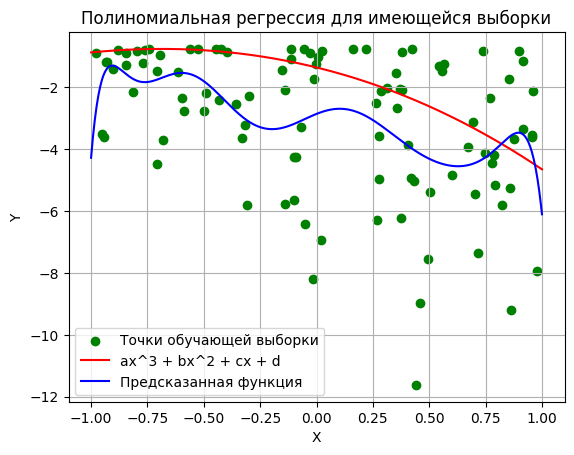

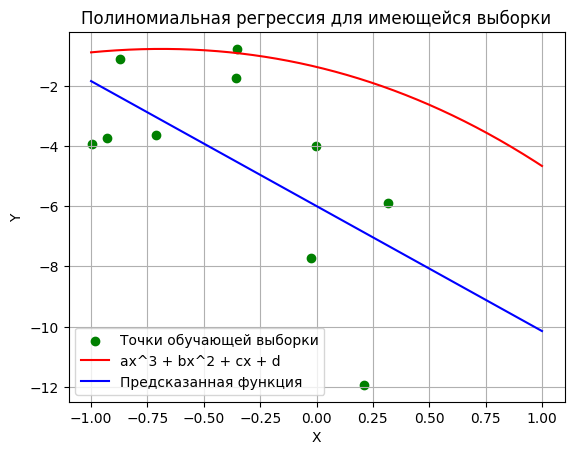

In [1219]:
num_samples = 1000
mean = 0
std = 1

x_normal_study = np.random.uniform(-1, 1, num_samples)
y_normal_study = normal_sample_generation(x_normal_study, mean, std, num_samples)

degree = 5

p = np.poly1d(np.polyfit(x_normal_study, y_normal_study, degree))

show_predict(x, y, p, x_normal_study, y_normal_study)


num_samples = 100
x_normal_study = np.random.uniform(-1, 1, num_samples)
y_normal_study = normal_sample_generation(x_normal_study, mean, std, num_samples)

degree = 10

p = np.poly1d(np.polyfit(x_normal_study, y_normal_study, degree))

show_predict(x, y, p, x_normal_study, y_normal_study)


num_samples = 10
x_normal_study = np.random.uniform(-1, 1, num_samples)
y_normal_study = normal_sample_generation(x_normal_study, mean, std, num_samples)

degree = 1

p = np.poly1d(np.polyfit(x_normal_study, y_normal_study, degree))

show_predict(x, y, p, x_normal_study, y_normal_study)